In [6]:
# Useful starting lines
%matplotlib inline
import datetime
from costs import compute_loss
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [7]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
# standardize the data
tX_std = standardize(tX)



In [8]:
print(tX_std)

[[ 0.46141372  0.06833197  0.40768027 ...  1.5668      1.55858439
   0.4125105 ]
 [ 0.51670419  0.55250482  0.54013641 ... -0.63936657 -0.63936694
  -0.27381996]
 [-2.33785898  3.19515553  1.09655998 ... -0.63936657 -0.63936694
  -0.29396985]
 ...
 [ 0.38016991  0.31931645 -0.13086367 ... -0.63936657 -0.63936694
  -0.31701723]
 [ 0.35431502 -0.84532397 -0.30297338 ... -0.63936657 -0.63936694
  -0.74543941]
 [-2.33785898  0.66533608 -0.25352276 ... -0.63936657 -0.63936694
  -0.74543941]]


# least squares GD

In [9]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    return (-1/len(y))*tx.T@(y-tx@w)
    # ***************************************************


def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """least square gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient computes the gradient
        gradient = compute_gradient(y,tx,w)
        # compute loss. here MSE is used
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # TODO: update w by gradient
        w = w-gamma*gradient
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

## test gd

Gradient Descent(0/49): loss=1.0
Gradient Descent(1/49): loss=0.9264755130297591
Gradient Descent(2/49): loss=0.8962466370379258
Gradient Descent(3/49): loss=0.8771600577769223
Gradient Descent(4/49): loss=0.8642270151661157
Gradient Descent(5/49): loss=0.8551458442459039
Gradient Descent(6/49): loss=0.8485355498878918
Gradient Descent(7/49): loss=0.8435390789639572
Gradient Descent(8/49): loss=0.839618166428172
Gradient Descent(9/49): loss=0.836430789564036
Gradient Descent(10/49): loss=0.8337566792321113
Gradient Descent(11/49): loss=0.8314517631067185
Gradient Descent(12/49): loss=0.8294201370090645
Gradient Descent(13/49): loss=0.827596702095248
Gradient Descent(14/49): loss=0.8259363236853894
Gradient Descent(15/49): loss=0.8244070000529391
Gradient Descent(16/49): loss=0.8229855127345691
Gradient Descent(17/49): loss=0.8216546239049244
Gradient Descent(18/49): loss=0.8204012464387307
Gradient Descent(19/49): loss=0.8192152314360012
Gradient Descent(20/49): loss=0.8180885519776158

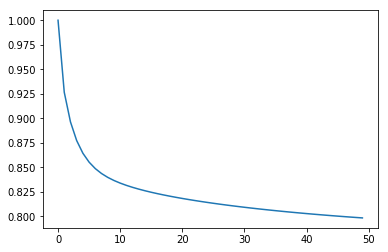

In [10]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(gradient_losses)

# least square SGD

In [11]:

def compute_stoch_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-tx@w
    return -1/len(y)*tx.T@e
    # ***************************************************


def least_squares_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    """Least square stochastic gradient descent algorithm."""
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute random batch
        a = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        a = list(a)
        tx2, y2 = a[0][1], a[0][0]
        
        # compute gradient & loss
        grad = compute_stoch_gradient(y2,tx2,w)
        loss= compute_loss(y2, tx2, w)
        print(grad)
        # update gradient
        w = w-gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("stoch Gradient Descent({bi}/{ti}): loss={l}".format(
              #bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

## test sgd

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[-0.22589894  0.33672592  0.01673999 -0.18735005 -0.13616536 -0.18343674
 -0.13514131 -0.00673135  0.01430768 -0.14755856  0.18717107 -0.26536809
 -0.13588436 -0.2270059  -0.00223646  0.00256975  0.03183871 -0.00521956
 -0.00711979 -0.02535051 -0.00673014 -0.13306003 -0.12743826 -0.15143792
 -0.14453439 -0.14450084 -0.13530287 -0.13580263 -0.13581461 -0.12945148]
[-0.2135564   0.30783095  0.00722088 -0.15221021 -0.09867292 -0.14835799
 -0.09762631 -0.02907616  0.02739443 -0.1128019   0.17570402 -0.22645733
 -0.09838468 -0.2019934  -0.00140754  0.01422057  0.02944908 -0.00551783
 -0.00729939 -0.00544224 -0.0076817  -0.09753991 -0.0894757  -0.1193694
 -0.11373189 -0.11372596 -0.09774295 -0.09830413 -0.09830609 -0.09360308]
[-0.19705246  0.29183012  0.00893373 -0.12039721 -0.06956857 -0.11779088
 -0.06854843 -0.04081243  0.03703637 -0.08251384  0.1742877  -0.21200225
 -0.06929072 -0.19210133  0.00

[-0.0671891   0.12270619  0.01833119 -0.03017989  0.00728908 -0.03795009
  0.00816483 -0.04917553  0.0412518  -0.00012835  0.06508589 -0.07175892
  0.00753035 -0.08044279  0.00514462  0.00030282 -0.00587097  0.00586012
 -0.00261057 -0.00275316 -0.00926055  0.01282798  0.03115492  0.00698325
  0.00814115  0.00816528  0.00829044  0.00757848  0.0076153   0.019564  ]
[-0.06041591  0.12612588  0.01206883 -0.03486477  0.0065202  -0.03768179
  0.00738365 -0.04885126  0.03420659  0.0011299   0.06082245 -0.07829909
  0.00676377 -0.08052894  0.00406439  0.00040157 -0.00949195  0.00024934
 -0.00094241 -0.00512055 -0.0017327   0.01605868  0.03288661  0.00542759
  0.00661138  0.0066287   0.00774857  0.00684339  0.00682654  0.0218842 ]
[-0.05336361  0.1194819   0.01767243 -0.02378891  0.00760199 -0.03615887
  0.00845668 -0.04805352  0.03854216  0.00606735  0.0633179  -0.07065578
  0.00783446 -0.07248975  0.00436048  0.00483624 -0.00226181  0.00623492
  0.0050995  -0.00069181  0.0050062   0.01918798 

[-0.01493775  0.06614777  0.02094824 -0.02053319 -0.00103685 -0.04075519
 -0.00025643 -0.03497133  0.02206664 -0.00258712  0.02218292 -0.03603474
 -0.00082261 -0.04947841  0.00067872  0.00480412 -0.0281876   0.00671826
 -0.00596058 -0.01737614 -0.00146967  0.01370999  0.02190112  0.00526986
  0.0061396   0.00614488 -0.00011049 -0.00076611 -0.00076377  0.01460502]
[-0.01433578  0.06025891  0.0225069  -0.01630253  0.00703755 -0.03437309
  0.00783523 -0.03846742  0.01691439  0.00752157  0.01844985 -0.03086005
  0.00725451 -0.03581639 -0.00333867  0.00053648 -0.02752875  0.00161441
 -0.00278437 -0.0247172   0.00111131  0.02479503  0.03063007  0.01063086
  0.01086476  0.01085536  0.00790945  0.0073104   0.00732704  0.02326599]
[-0.01844001  0.06429417  0.02157223 -0.02456179 -0.00340177 -0.04363792
 -0.002603   -0.03063054  0.02757708 -0.00657182  0.02050864 -0.04091684
 -0.00318042 -0.05383627  0.007084    0.00431424 -0.03315132 -0.0038227
  0.00647836 -0.01693566  0.00512808  0.00919886  

[-0.00583108  0.04001745  0.02209879 -0.00772039  0.00534942 -0.03212353
  0.00607942 -0.03363665  0.01323755  0.00351372  0.00458276 -0.01858522
  0.00555407 -0.02751897  0.00234078 -0.00102379 -0.03737654  0.0048217
  0.00373214 -0.01497094  0.00020129  0.01646185  0.02701718  0.01015568
  0.01041413  0.01040742  0.00612236  0.00559923  0.00561546  0.01885434]
[-0.00283483  0.03616268  0.01939207 -0.0030846   0.00419549 -0.03437563
  0.00497688 -0.03856316  0.01570075  0.0077517   0.00487754 -0.01542705
  0.00440599 -0.01820947 -0.00406336  0.00494035 -0.0315867  -0.00693404
  0.00011231 -0.01649556  0.00852718  0.0207091   0.02294499  0.00624978
  0.00620429  0.00620416  0.00523934  0.00446588  0.0044687   0.02042515]
[ 0.00785985  0.02656292  0.02047923 -0.00411019  0.00166956 -0.03626931
  0.00243034 -0.02789118  0.01260334  0.00287251  0.00860594 -0.01691731
  0.00187696 -0.03113117 -0.00089302 -0.00432953 -0.03298777 -0.00068911
  0.00199205 -0.02129664  0.00712723  0.01762647  

[ 0.00155553  0.03288015  0.02846951 -0.00606441 -0.00406062 -0.03860127
 -0.00337571 -0.02504417  0.00772456  0.00346902  0.0020803  -0.02181692
 -0.00386859 -0.01456695 -0.00294838  0.00289136 -0.0262501  -0.00200928
  0.00229149 -0.01617204  0.00251211  0.01671006  0.008681   -0.00866377
 -0.00955067 -0.00955838 -0.00312382 -0.00383049 -0.00380812  0.01333529]
[ 0.00243342  0.0275407   0.02442604 -0.00669983  0.00226233 -0.03254311
  0.00296761 -0.02521591 -0.00309694 -0.00091625  0.00049818 -0.00998105
  0.00244869 -0.02845452  0.00145532  0.00022593 -0.03715745 -0.00183748
  0.00146717 -0.01395971 -0.00028562  0.01328798  0.01878174  0.00330514
  0.00331167  0.00330953  0.00288556  0.0025001   0.00251957  0.01378947]
[ 4.51277459e-03  2.60431134e-02  2.11367959e-02 -5.74102212e-03
 -2.91675314e-03 -3.88327291e-02 -2.20600566e-03 -2.64596500e-02
  3.79234711e-03  1.03106145e-03 -7.72594948e-05 -1.98721390e-02
 -2.71290767e-03 -1.93100159e-02  3.92172347e-03 -3.70347117e-03
 -3.4414

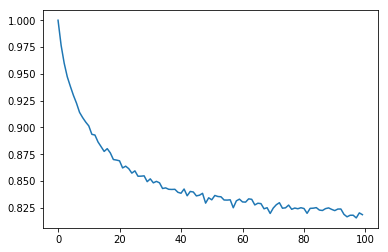

In [12]:
from proj1_helpers import batch_iter
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.02
batch_size = 50000

# Initialization
w_initial = np.zeros(30)
print(w_initial)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = least_squares_SGD(
    y, tX_std, w_initial,batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

plt.plot(sgd_losses)

# least square
computed by solving for w:  X<sup>T</sup>X * w = X<sup>T</sup>y

In [13]:
def least_square(y, tx):
    w = np.linalg.solve(tx.T@tx,tx.T@y)
    return w, compute_loss(y, tx, w)


In [14]:
wls, loss = least_square(y, tX_std)

# Ridge regression

In [15]:
def ridge_regression(y, tx, lamda):
    w = np.linalg.solve(tx.T@tx+lamda*np.eye(tx.shape[1]),tx.T@y)
    return w, compute_loss(y, tx, w)


In [16]:
wls, loss = ridge_regression(y, tX_std,0)
print(loss)

0.7779046298744507


# Logistic regression

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def update_weights(tx, y, w, gamma):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y)
    w -= gradient*gamma / len(tx)
    return w

def loss_function(tx, y, w):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    #the error when label=1
    error1 = -y*np.log(probabilities)
    #the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    #return average of sum of costs
    return (error1-error2).mean()


# logistic regression function
def logistic_regression(y,tx, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights(tx, y, initial_w, gamma)
        loss = loss_function(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses)[-1], np.array(ws)[-1]

#################################################################################
def decision_boundary(prob):
    return 1 if prob > 0.5 else -1

def classify(predictions):
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

# reg logistic regression

In [22]:
def update_weights_reg(tx, y, w, gamma, lambda_):
    # probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y) + lambda_ * w
    w -= gradient*gamma / len(tx)
    return w

def reg_loss_function(tx, y, w):
    # probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    # the error when label=1
    error1 = -y*np.log(probabilities)
    # the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    # return average of sum of costs
    return (error1-error2).mean()+lambda_/2*np.dot(w.T,w)/ len(tx)


# regularized logistic regression function
def reg_logistic_regression(y,tx,lambda_, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights_reg(tx, y, initial_w, gamma,lambda_)
        loss = loss_function(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses)[-1], np.array(ws)[-1]


## test logistic regression

losses: [0.68698116 0.68106329],
 ws: [[ 4.51727872e-03 -6.64487956e-03 -2.65209130e-04  3.61254514e-03
   2.64152264e-03  3.59392280e-03  2.62081369e-03  2.52926745e-04
  -3.06855707e-04  2.86311708e-03 -3.70121190e-03  5.12273476e-03
   2.63582992e-03  4.44186936e-03 -1.82361106e-05 -8.36089620e-05
  -6.13282687e-04  2.79536175e-05  7.82015864e-05  4.07365473e-04
   1.41154484e-04  2.52885405e-03  2.48473858e-03  2.94833288e-03
   2.81467076e-03  2.81464758e-03  2.62361593e-03  2.63429177e-03
   2.63411696e-03  2.50226015e-03]
 [ 4.51727872e-03 -6.64487956e-03 -2.65209130e-04  3.61254514e-03
   2.64152264e-03  3.59392280e-03  2.62081369e-03  2.52926745e-04
  -3.06855707e-04  2.86311708e-03 -3.70121190e-03  5.12273476e-03
   2.63582992e-03  4.44186936e-03 -1.82361106e-05 -8.36089620e-05
  -6.13282687e-04  2.79536175e-05  7.82015864e-05  4.07365473e-04
   1.41154484e-04  2.52885405e-03  2.48473858e-03  2.94833288e-03
   2.81467076e-03  2.81464758e-03  2.62361593e-03  2.63429177e-03
   

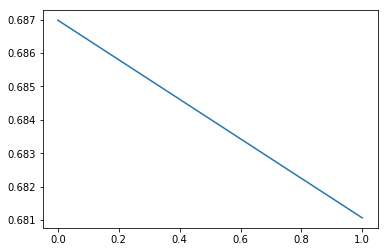

In [19]:
# Define the parameters of the algorithm.
max_iters = 2
gamma = 0.01
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
losses, ws  = logistic_regression(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
plt.plot(losses)
print(f'losses: {losses},\n ws: {ws}')

# test on test set

In [78]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)



In [100]:
def standardize_test(tx, tx_test):
    centered_data = tx_test - np.mean(tx, axis=0)
    std_data = centered_data / np.std(tx, axis=0)
    return std_data
tX_test_std = standardize_test(tX, tX_test)
OUTPUT_PATH = 'outLogRegD23.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(wf[1], tX_test_std)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

# test reg logistic regression

In [ ]:
#Define the parameters of the algorithm.
max_iters = 100
gamma = 0.170565

lambda_ = 0.0000002

# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
losses, ws  = reg_logistic_regression(y, tX_std,lambda_, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(losses)
print(f'best loss: {losses[-10:]}')

In [ ]:
print(ws[-1],ws[-4])


# K-Fold cross validation
### computes for k pairs of train set and validation set the loss when training the weights on train sets and computing loss on the validations sets

In [62]:
#update logistic regression in order to compute loss on validation set
def logistic_regression_val(tx_val,y_val,tx,y, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        # update weights by gradient descent
        w = update_weights(tx, y, initial_w, gamma)
        # compute loss on validation sets according to weights w
        loss = loss_function(tx_val, y_val, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses)[-1], np.array(ws)[-1]

In [134]:
# compute K pairs of validations sets  of length 250 000 / K and train set of size 250 000- 250 000/K
def parallel_shuffle(tx, y):
    rng_state = np.random.get_state()
    np.random.shuffle(tx)
    np.random.set_state(rng_state)
    np.random.shuffle(y)
def split_cross_KFold(K, tx, y):
    parallel_shuffle(tx,y)
    train_set, val_set = [], []
    size = tX_std.shape[0]//K
    for i in range(K):
        val_set.append((tX_std[size*i:size+size*i], y[size*i:size+size*i]))
        indices = range(size*i,size+size*i)
        train_set.append((np.delete(tX_std, indices, axis = 0),np.delete(y, indices, axis = 0)))
    return train_set, val_set
def evaluate_Kfold_logistic(train_set,validation_set,iters, gamma,K):
    
    weigths_final = []
    losses_final = []
    
    for i in range(K):
        max_iters = iters
        # Initialization
        w_initial = np.zeros(30)
        # validation set [i][0] is matrice tx of the validation set i
        # validation set [i][1] is vector y of the validation set i
        losses, ws  = logistic_regression_val(validation_set[i][0],validation_set[i][1], train_set[i][0], train_set[i][1], w_initial, max_iters, gamma)
        losses_final.append(losses)
        weigths_final.append(ws)
        
    return weigths_final, losses_final
    


    

# test kfold with log

In [130]:
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
# standardize the data
tX_std = standardize(tX)


In [137]:
K=5
trainset, valset = split_cross_KFold(K, tX_std, y)
wf, lf = evaluate_Kfold_logistic(trainset, valset, 100,0.170565,K )

/Users/Maxime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/Maxime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [138]:
print(np.mean(lf, axis=0))
print(np.argmin(lf))
print(np.min(lf)) 
a=0
for i in lf:
    a+=1
    print(i, a)

nan
2
nan
0.10592631048895192 1
0.07128053903164433 2
nan 3
0.06884267273071058 4
0.08500116088183626 5


In [136]:
print(np.mean(lf, axis=0))
print(np.argmin(lf))
print(np.min(lf)) 
a=0
for i in lf:
    a+=1
    print(i, a)

0.3934482065879018
3
0.3853066823208734
0.3953732438355736 1
0.3902561225517564 2
0.40156576503668273 3
0.3853066823208734 4
0.39473921919462307 5


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
tX_test_std = standardize(tX_test)  # standardize par rapport a tX_train mean and std? 

In [ ]:
OUTPUT_PATH = 'out' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(wf[7], tX_test_td)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
predict_labels(gradient_ws[-1], tX_test_std)